In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
train_dir = '/content/sample_data/train'
test_dir = '/content/sample_data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 551 images belonging to 3 classes.
Found 136 images belonging to 3 classes.
Found 163 images belonging to 3 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(
    optimizer=Adam(lr=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
17/17 [==============================] - 41s 2s/step - loss: -7347.5938 - accuracy: 0.0520 - val_loss: -44692.3047 - val_accuracy: 0.0469
Epoch 2/10
17/17 [==============================] - 44s 3s/step - loss: -509827.5312 - accuracy: 0.0501 - val_loss: -1858238.1250 - val_accuracy: 0.0469
Epoch 3/10
17/17 [==============================] - 36s 2s/step - loss: -8226585.0000 - accuracy: 0.0520 - val_loss: -22571092.0000 - val_accuracy: 0.0469
Epoch 4/10
17/17 [==============================] - 37s 2s/step - loss: -65648776.0000 - accuracy: 0.0520 - val_loss: -147660304.0000 - val_accuracy: 0.0469
Epoch 5/10
17/17 [==============================] - 37s 2s/step - loss: -346889248.0000 - accuracy: 0.0520 - val_loss: -663327872.0000 - val_accuracy: 0.0469
Epoch 6/10
17/17 [==============================] - 38s 2s/step - loss: -1285841792.0000 - accuracy: 0.0539 - val_loss: -2237736448.0000 - val_accuracy: 0.0469
Epoch 7/10
17/17 [==============================] - 34s 2s/step - lo

5/5 [==============================] - 6s 1s/step - loss: -28526514176.0000 - accuracy: 0.5938
Test Accuracy: 59.38%


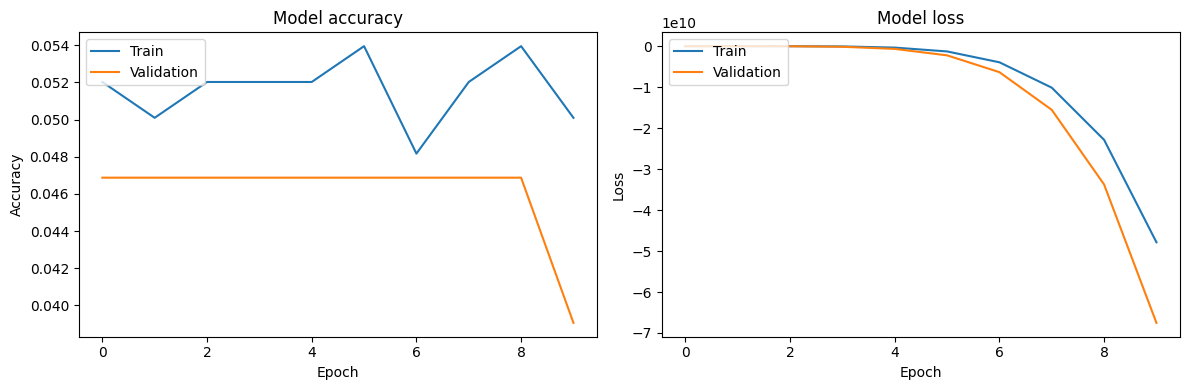

6/6 [==============================] - 4s 632ms/step


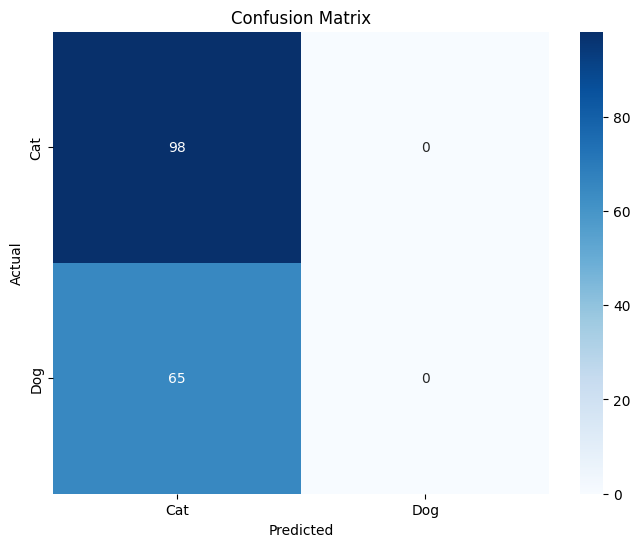

Classification Report
              precision    recall  f1-score   support

         Cat       0.60      1.00      0.75        98
         Dog       0.00      0.00      0.00        65

    accuracy                           0.60       163
   macro avg       0.30      0.50      0.38       163
weighted avg       0.36      0.60      0.45       163



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = test_generator.classes[:len(y_pred)]
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))
